##  Network design notes

You must use one hidden layer and fully connected layers with ReLU or a variation (not convolutional nodes) for hidden nodes as well as softmax for the output layer. You will measure loss with cross-entropy

Use Adam to optimize the training set.

Use at least two sets of hyperparameters (at least 2 layers?)

Use a regularizer & evaluate your systems performance with and without it

Perform at least 2x2x2 = 8 training runs



In [1]:
from __future__ import print_function

import os  # to work with file paths

import tensorflow as tf         # to specify and run computation graphs
import numpy as np              # for numerical operations taking place outside of the TF graph
import matplotlib.pyplot as plt # to draw plots
from scipy.sparse import csc_matrix
fmnist_dir = '/work/cse479/shared/homework/01/'

## helper functions

when moving this to the three python files, place the functions below in a *util.py* file

In [2]:
def split_data(data, proportion):
    """
    Split a numpy array into two parts of `proportion` and `1 - proportion`
    
    Args:
        - data: numpy array, to be split along the first axis
        - proportion: a float less than 1
    """
    size = data.shape[0]
    split_idx = int(proportion * size)
    np.random.shuffle(data)
    return data[:split_idx], data[split_idx:]

In [3]:
def labelToArray(labelArray):
    convertedLabelArray = []
    for label in labelArray:
        element = np.zeros(10)
        element[int(label)] = 1
        convertedLabelArray.append(element)
    return convertedLabelArray

## get the data

#### Vector of dimension 784 (corresponding to pixel values of 28x28 images) each with integer from 0-255 

| *Label Value* | *Meaning*     |
| ------------- |:-------------:|
| 0      | T-shirt / Top |
| 1      | Trouser  |
| 2      | Pullover |
| 3      | Dress |
| 4      | Coat |
| 5      | Sandal  |
| 6      | Shirt |
| 7      | Sneaker |
| 8      | Bag |
| 9      | Ankle Boot |

In [ ]:
# extract the dataset and split into 80% training and 80% testing
data_train, data_test = split_data(np.load(fmnist_dir + 'fmnist_train_data.npy'), 0.8)
labels_train, labels_test = split_data(np.load(fmnist_dir + 'fmnist_train_labels.npy'), 0.8)

# convert the matrices from 0-255 to one hot encoded data
#data_train = tf.math.multiply(data_train,1/255)
#data_test = tf.math.multiply(data_test,1/255)


labels_test = labelToArray(labels_test)
labels_train = labelToArray(labels_train)

plt.imshow(np.reshape(data_train[1], (28,28)))


# Define the model

References
keras's model api https://www.tensorflow.org/api_docs/python/tf/keras/Model
tf.layers.Dense
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

first layer will have 400 nodes

### tf.keras.layers.Dense()
see the docs in references for more information

W1011 14:12:50.733970 47351219245184 deprecation.py:506] From /util/opt/anaconda/deployed-conda-envs/packages/tensorflow-gpu/envs/tensorflow-gpu-1.14.0-py36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1011 14:12:51.297392 47351219245184 deprecation.py:323] From /util/opt/anaconda/deployed-conda-envs/packages/tensorflow-gpu/envs/tensorflow-gpu-1.14.0-py36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 38400 samples, validate on 9600 samples
Epoch 1/100
38400/38400 [==============================] - 7s 180us/sample - loss: 2.1533 - acc: 0.8937 - val_loss: 1.6478 - val_acc: 0.9000
Epoch 2/100
38400/38400 [==============================] - 6s 165us/sample - loss: 1.5807 - acc: 0.9000 - val_loss: 1.5527 - val_acc: 0.9000
Epoch 3/100
38400/38400 [==============================] - 6s 164us/sample - loss: 1.5477 - acc: 0.9000 - val_loss: 1.5447 - val_acc: 0.9000
Epoch 4/100
38400/38400 [==============================] - 6s 168us/sample - loss: 1.5437 - acc: 0.9000 - val_loss: 1.5431 - val_acc: 0.9000
Epoch 5/100
38400/38400 [==============================] - 7s 170us/sample - loss: 1.6381 - acc: 0.8999 - val_loss: 1.6831 - val_acc: 0.9000
Epoch 6/100
38400/38400 [==============================] - 6s 167us/sample - loss: 1.6531 - acc: 0.9000 - val_loss: 1.6234 - val_acc: 0.9000
Epoch 7/100
38400/38400 [==============================] - 6s 165us/sample - loss: 1.5975 - acc: 0.9000 -

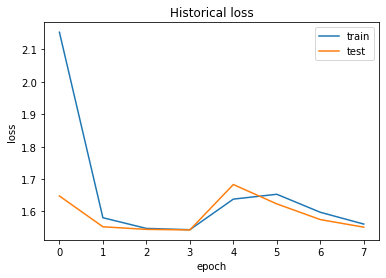

12000/12000 [==============================] - 1s 75us/sample - loss: 1.5515 - acc: 0.9000


Test loss: 1.551497220993042
Test accuracy: 0.89999664


In [5]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    
    # create the network
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(100, 
                        input_shape=(784,),
                        kernel_regularizer=tf.keras.regularizers.l2(l=0.01),
                        activation='relu'));
    model.add(tf.keras.layers.Dense(10,
                        kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
    
    
    model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])
    
    # define an early stopping callback for model.fit()
    # stop if there are 4 consecutive epochs with no improvement
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
    

    # train & validate. Allocate 20% for validation set. 100 epochs
    history = model.fit(np.array(data_train), np.array(labels_train), batch_size = 32, epochs=100, callbacks=[early_stopping_callback], verbose=1, shuffle=True, validation_split=0.2)
    # plot
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Historical loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()
    score = model.evaluate(np.array(data_test), np.array(labels_test), verbose=1)
    print('\n\nTest loss:', score[0])
    print('Test accuracy:', score[1])
    

In [9]:
with tf.Session() as session:
    model = tf.keras.models.load_model('fmnist_model.h5')
    model.summary()
    model.evaluate(np.array(data_test), np.array(labels_test), verbose=2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
12000/12000 - 1s - loss: 1.5425 - acc: 0.9000


| *Label Value* | *Meaning*     |
| ------------- |:-------------:|
| 0      | T-shirt / Top |
| 1      | Trouser  |
| 2      | Pullover |
| 3      | Dress |
| 4      | Coat |
| 5      | Sandal  |
| 6      | Shirt |
| 7      | Sneaker |
| 8      | Bag |
| 9      | Ankle Boot |